In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


### 1. Data Preparation:

In [53]:
data=pd.read_excel(r"C:\Users\Admin\Desktop\DS_Assignments\Assignment_13_Decision-tree\Decision Tree\heart_disease.xlsx", sheet_name="Heart_disease", 
                   index_col=0)
data

,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
age,,,,,,,,,,,,
63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
41,Male,atypical angina,135,203,False,normal,132,False,0.0,flat,fixed defect,0
57,Male,asymptomatic,140,192,False,normal,148,False,0.4,flat,fixed defect,0
52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.0,flat,fixed defect,0
57,Male,asymptomatic,110,201,False,normal,126,True,1.5,flat,fixed defect,0
...,...,...,...,...,...,...,...,...,...,...,...,...
53,Male,asymptomatic,125,0,False,normal,120,False,1.5,upsloping,reversable defect,4
62,Male,asymptomatic,166,170,False,st-t abnormality,120,True,3.0,flat,reversable defect,4
56,Male,non-anginal,170,0,False,lv hypertrophy,123,True,2.5,downsloping,normal,4


In [54]:
data.head()

,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
age,,,,,,,,,,,,
63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
41,Male,atypical angina,135,203,False,normal,132,False,0.0,flat,fixed defect,0
57,Male,asymptomatic,140,192,False,normal,148,False,0.4,flat,fixed defect,0
52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.0,flat,fixed defect,0
57,Male,asymptomatic,110,201,False,normal,126,True,1.5,flat,fixed defect,0


### 2. Exploratory Data Analysis (EDA):

In [55]:
numerical_col=data.select_dtypes(include=['int64', 'float64']) # finding only numerical col.
numerical_col
# numerical_col1=len(numerical_col.columns)
# numerical_col1

,trestbps,chol,thalch,oldpeak,num
age,,,,,
63,145,233,150,2.3,0
41,135,203,132,0.0,0
57,140,192,148,0.4,0
52,118,186,190,0.0,0
57,110,201,126,1.5,0
...,...,...,...,...,...
53,125,0,120,1.5,4
62,166,170,120,3.0,4
56,170,0,123,2.5,4


In [56]:
categorical_columns = data.select_dtypes(include=['object', 'category']) # Select only the categorical columns
categorical_columns
# num_categorical_columns = len(categorical_columns.columns) # Count the number of categorical columns
# num_categorical_columns

,sex,cp,restecg,exang,slope,thal
age,,,,,,
63,Male,typical angina,lv hypertrophy,False,downsloping,fixed defect
41,Male,atypical angina,normal,False,flat,fixed defect
57,Male,asymptomatic,normal,False,flat,fixed defect
52,Male,typical angina,lv hypertrophy,False,flat,fixed defect
57,Male,asymptomatic,normal,True,flat,fixed defect
...,...,...,...,...,...,...
53,Male,asymptomatic,normal,False,upsloping,reversable defect
62,Male,asymptomatic,st-t abnormality,True,flat,reversable defect
56,Male,non-anginal,lv hypertrophy,True,downsloping,normal


In [57]:
data.shape

(908, 12)

In [58]:
# Check for missing values
print(data.isnull().sum())

sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalch       0
exang        0
oldpeak     62
slope        0
thal         0
num          0
dtype: int64


In [59]:
# Display basic statistics for numerical features

data.describe()

,trestbps,chol,thalch,oldpeak,num
count,908.000000,908.000000,908.000000,846.000000,908.000000
mean,133.430617,201.484581,135.957048,0.891253,1.008811
std,20.401608,112.097949,26.804929,1.093875,1.144436
min,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,120.000000,176.750000,118.000000,0.000000,0.000000
50%,130.000000,224.000000,138.000000,0.500000,1.000000
75%,144.000000,270.000000,156.000000,1.500000,2.000000
max,200.000000,603.000000,202.000000,6.200000,4.000000


### Missing value imputation

<Axes: ylabel='age'>

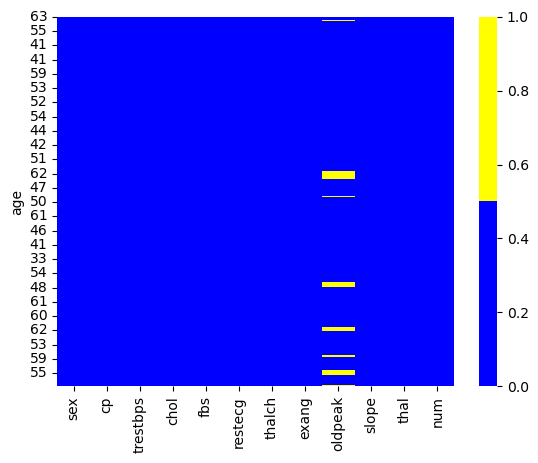

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt
cols=data.columns
colours = ['blue', 'yellow'] # specify the colours - yellow is missing. blue is not missing.
sns.heatmap(data[cols].isnull(),cmap=sns.color_palette(colours))

### Handeling Missing Value


In [61]:
# filling those null value
mean = data['oldpeak'].mean()
print(mean)


0.8912529550827422


In [62]:
#filling out those null value
data['oldpeak'] = data['oldpeak'].fillna(mean)
data.head()

,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
age,,,,,,,,,,,,
63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
41,Male,atypical angina,135,203,False,normal,132,False,0.0,flat,fixed defect,0
57,Male,asymptomatic,140,192,False,normal,148,False,0.4,flat,fixed defect,0
52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.0,flat,fixed defect,0
57,Male,asymptomatic,110,201,False,normal,126,True,1.5,flat,fixed defect,0


###  ***Outlier detection***

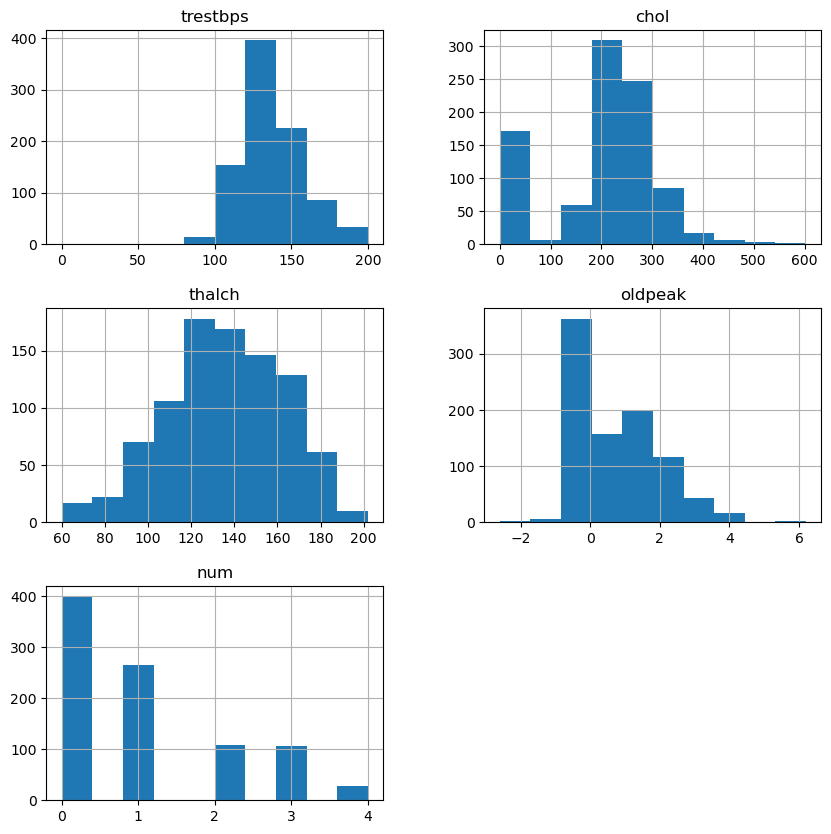

In [63]:
# Histogram for numerical features
data.hist(figsize=(10, 10))
plt.show()

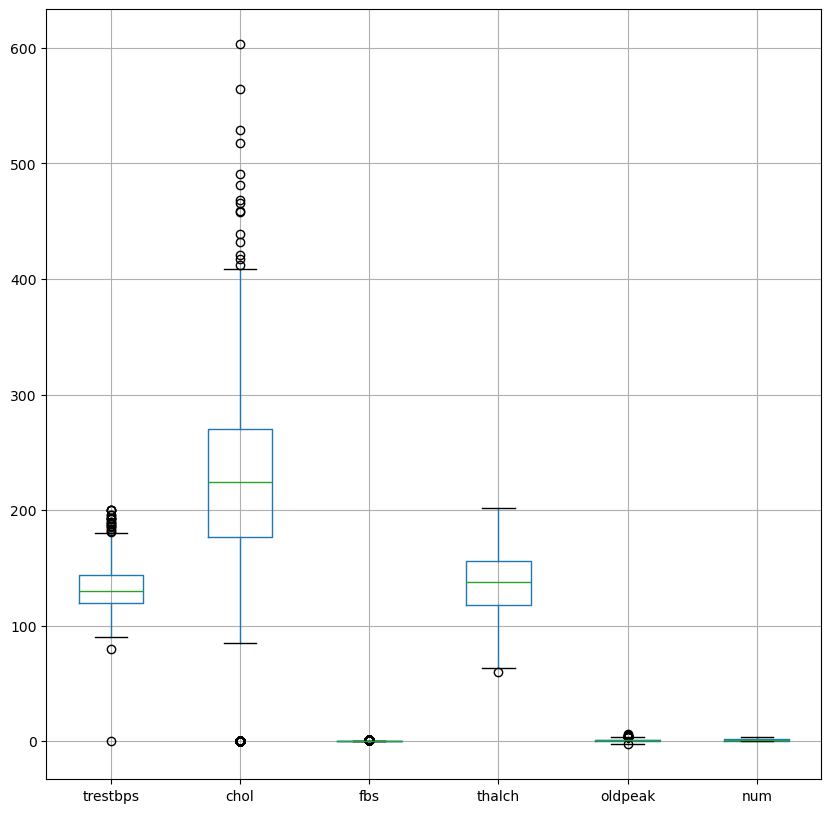

In [64]:
# Box plots for numerical features
data.boxplot(figsize=(10, 10))
plt.show()


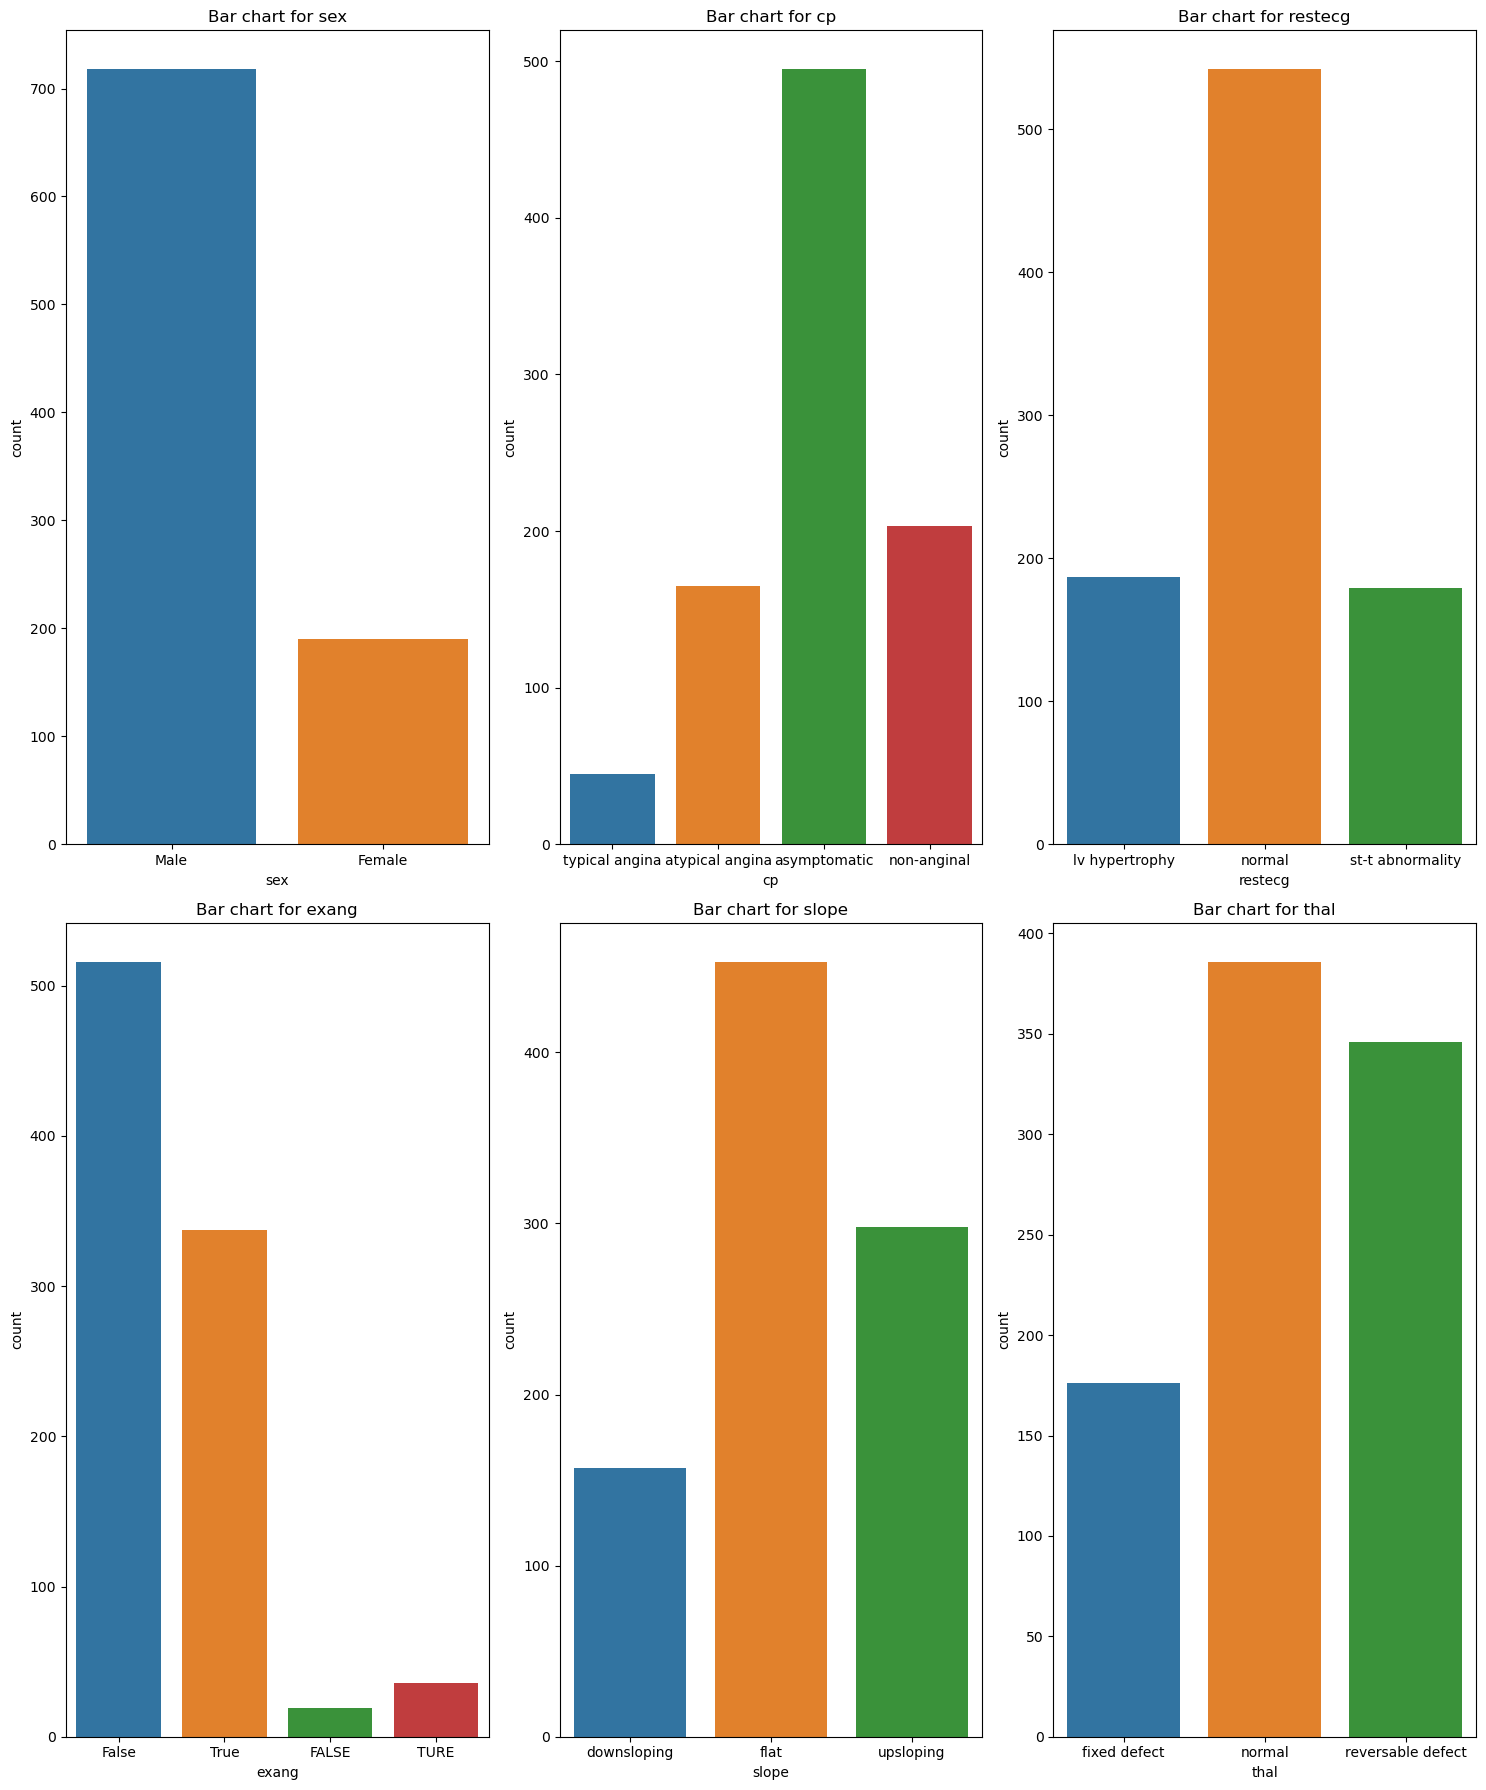

In [65]:
# Assuming 'df' is your DataFrame
categorical_columns = data.select_dtypes(include='object')

# Create subplots
fig, axes = plt.subplots(nrows=2,ncols=3, figsize=(15,18))

# Flatten axes if it's a 1D array
axes = axes.flatten()

# Iterate through categorical columns and plot their countplots
for i, column in enumerate(categorical_columns.columns):
    sns.countplot(data=data, x=column, ax=axes[i])
    axes[i].set_title(f'Bar chart for {column}')

# Hide empty subplots
for j in range(len(categorical_columns.columns),len(axes)):
    axes[j].axis('off')


plt.tight_layout()

plt.show()



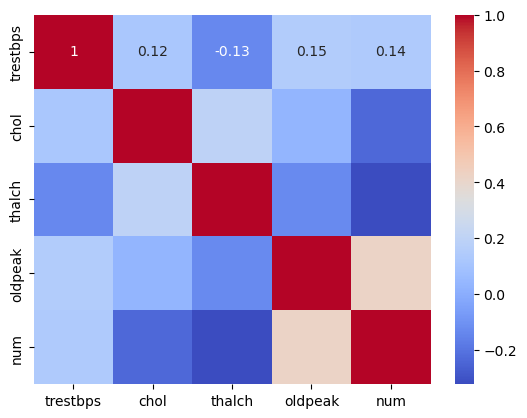

In [66]:
#Correlation matrix
# Exclude non-numeric columns from correlation calculation
numeric_df = data.select_dtypes(include=['int64', 'float64'])

# Calculate correlation matrix
corr = numeric_df.corr()

# Visualize correlation matrix
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

### 3 Feature Engineering

In [67]:
# already handles missing values at start of the file


In [68]:
# Scaling numerical features (optional)

from sklearn.preprocessing import StandardScaler

# Select only numeric columns for scaling
numeric_df = data.select_dtypes(include=['int64', 'float64'])

# Initialize StandardScaler
scaler = StandardScaler()

# Scale numeric data
scaled_data = scaler.fit_transform(numeric_df)

# Convert the scaled data back to a DataFrame
data_scaled = pd.DataFrame(scaled_data, columns=numeric_df.columns)

### 4.Decision Tree Classification:

In [69]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['fbs'] = data['fbs'].astype(int)
data['thal'] = le.fit_transform(data['thal'])
data['restecg'] = le.fit_transform(data['restecg'])

for col in data.columns:
    if data[col].dtype == ['object' or 'str' or 'bool']:
        # Apply label encoding to the column
        data[col] = le.fit_transform(data[col])
le = LabelEncoder()
# Convert boolean column to numeric
data['slope'] = le.fit_transform(data['slope'])
data['sex'] = le.fit_transform(data['sex'])
data['cp'] = le.fit_transform(data['cp'])

In [70]:
data['exang'] = data['exang'].replace({'TURE': True, 'FALSE': False})
# Convert to uniform boolean type
data['exang'] = data['exang'].astype(bool)
# Initialize LabelEncoder
le = LabelEncoder()
# Convert boolean column to numeric
data['exang'] = le.fit_transform(data['exang'])

In [71]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import recall_score ,accuracy_score , f1_score,precision_score ,roc_auc_score

# split the data into X and y
X= data.drop('num', axis=1)
y = data['num']

In [72]:
# Split the data into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [73]:
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)
# Predict on the test set
y_pred = model.predict(X_test)

In [74]:
# Evaluate the model performance

accuracy = model.score(X_test, y_test)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro',)
f1 = f1_score(y_test, y_pred, average='macro')
# roc_auc = roc_auc_score(y_test, y_pred)
print("Accuracy: ", accuracy)
print("Precision: ", precision)
print("Recall: ", recall)
print("F1-Score: ", f1)
# print("ROC-AUC: ", roc_auc)


Accuracy:  0.46153846153846156
Precision:  0.27904758730065116
Recall:  0.27840783913156686
F1-Score:  0.27692307692307694


In [75]:

# Print classification report for a detailed breakdown of performance metrics
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.64      0.70      0.67        89
           1       0.33      0.29      0.31        48
           2       0.29      0.23      0.26        22
           3       0.14      0.18      0.15        17
           4       0.00      0.00      0.00         6

    accuracy                           0.46       182
   macro avg       0.28      0.28      0.28       182
weighted avg       0.45      0.46      0.45       182



### Confusion matrix

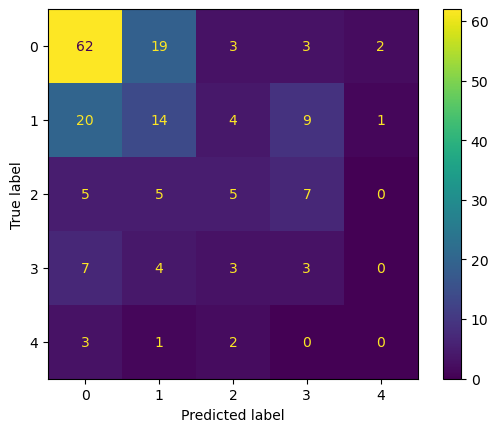

In [76]:
# confusion matrix

import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()
plt.show()

### 5. Hyperparameter Tuning:

In [77]:
# Retrain the model on best hyperparameter
model = DecisionTreeClassifier(max_depth=2)
model.fit(X_train , y_train) # train the model

# Prediction on test
y_pred = model.predict(X_test)

# evaluate vaildation Accuracy
acc= accuracy_score(y_test , y_pred , normalize=True ) * float(100)

print('\nTest accuracy  ' + ' is :'+str(acc) )



Test accuracy   is :57.14285714285714


In [84]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

In [85]:
# Define the hyperparameters to tune

dt_classifier = DecisionTreeClassifier(random_state=42)
params = {
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}

In [109]:
# Grid search cross-validation
grid_search = GridSearchCV(dt_classifier, params, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 5, 10, 15],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [110]:
# Get the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)


Best Parameters: {'criterion': 'gini', 'max_depth': 5, 'min_samples_split': 2}


In [111]:
# Using the best parameters to train the model
best_dt_classifier = DecisionTreeClassifier(**best_params, random_state=42)
best_dt_classifier.fit(X_train, y_train)

# Predicting on the testing set using the tuned model
y_pred_tuned = best_dt_classifier.predict(X_test)

# Evaluating performance of the tuned model
print("Accuracy (Tuned):", accuracy_score(y_test, y_pred_tuned))
print("Classification Report (Tuned):\n", classification_report(y_test, y_pred_tuned))
print("Confusion Matrix (Tuned):\n", confusion_matrix(y_test, y_pred_tuned))

Accuracy (Tuned): 0.554945054945055
Classification Report (Tuned):
               precision    recall  f1-score   support

           0       0.74      0.82      0.78        89
           1       0.36      0.48      0.41        48
           2       0.38      0.14      0.20        22
           3       0.18      0.12      0.14        17
           4       0.00      0.00      0.00         6

    accuracy                           0.55       182
   macro avg       0.33      0.31      0.31       182
weighted avg       0.52      0.55      0.53       182

Confusion Matrix (Tuned):
 [[73 12  3  1  0]
 [18 23  1  6  0]
 [ 3 15  3  1  0]
 [ 4 10  1  2  0]
 [ 1  4  0  1  0]]


C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Step 6: Model Evaluation and Analysis

In [112]:
 #Print the feature names and the number of features
print("Feature Names:", data.columns)
print("Number of Features:", len(data.columns))

Feature Names: Index(['sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalch', 'exang',
       'oldpeak', 'slope', 'thal', 'num'],
      dtype='object')
Number of Features: 12


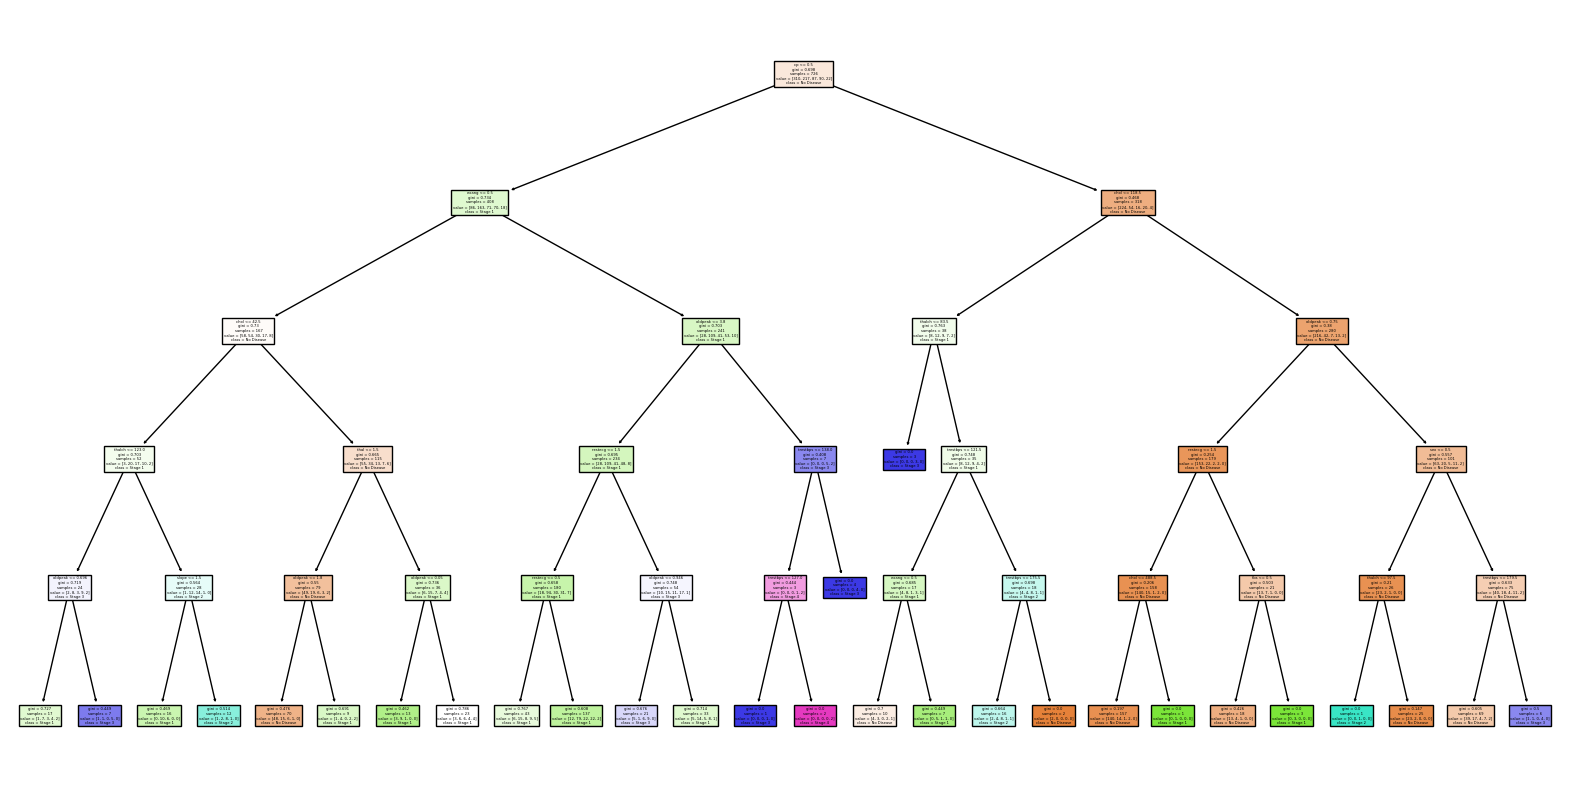

In [113]:

from sklearn.tree import plot_tree

# Plotting the decision tree
plt.figure(figsize=(20, 10))
plot_tree(best_dt_classifier, feature_names=data.columns[:-1], class_names=['No Disease', 'Stage 1', 'Stage 2', 'Stage 3', 'Stage 4'], filled=True)
plt.show()

### ***Interview Questions:*** ###


### 1. What are some common hyperparameters of decision tree models, and how do they affect the model's performance?

<b> Max_depth </B> Controls the maximum depth of the tree. Increasing max_depth can lead to more complex trees that can capture intricate patterns in the data, but it also increases the risk of overfitting.

<b> Min_samples_split </B> The minimum number of samples required to split an internal node. Increasing min_samples_split can lead to simpler trees by preventing splits that produce fewer samples in child nodes, thus reducing overfitting.

<b> Min_samples_leaf </B> The minimum number of samples required to be at a leaf node. Increasing min_samples_leaf can also prevent overfitting by ensuring that each leaf node has a minimum number of samples, but it may result in smaller tree structures.

<b> Max_features </B> The number of features to consider when looking for the best split. Limiting max_features can prevent the model from considering too many features at each split, potentially reducing overfitting and speeding up the training process.

<b> Criterion </B> The function used to measure the quality of a split. Common criteria are "gini" for the Gini impurity and "entropy" for information gain. The choice of criterion can affect the shape of the resulting tree and its ability to separate classes effectively.ly.
ly.


### 2. What is the difference between the Label encoding and One-hot encoding?

<B>Label Encoding: </B>Label Encoding is a technique where categorical variables are assigned unique integer labels. Each category is mapped to an integer value. It is suitable for ordinal categorical variables where there is a natural ordering among the categories. However, using label encoding for nominal categorical variables (where there is no inherent order) can lead to misinterpretation by the model, as it may assign ordinal relationships where none exist.
<B>
One-hot Encoding:</B> One-hot Encoding is a technique where categorical variables are converted into binary vectors, with each category represented as a binary vector where only one bit is "hot" (1) and the rest are "cold" (0). Each category becomes its own binary feature. One-hot encoding is suitable for nominal categorical variables, as it preserves the categorical nature of the variables and does not introduce any ordinal relationships. However, it can lead to a high-dimensional feature space, especially if there are many categories, which may increase computational complexity.